In [0]:
!pip install -q quandl

In [2]:
import quandl
import numpy as np 
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from statsmodels.tsa.arima_model import ARIMA
from sklearn.model_selection import train_test_split


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,10

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## WEIGHTED AVERAGING ENSEMBLE method for Regression-

An ensemble of classifiers is a set of meodels that give an aggregated opinion on **classification** of a new sample but we will apply it for **regression**.

A **weighted ensemble** is a typre of ensemble where the weightage given to each opinion depends on the individual model's **performance**.

### The model weights are small values **between 0 and 1** that represent the percentage or fraction of trust or expeced performance from each model.

The sum of all model weights will equal 1 or 100%.

In [7]:
df=pd.read_csv("/content/drive/My Drive/DM_Project/final_dataset.csv",)
df

,Unnamed: 0,date,Category,high,low,open,close,volume,adj_close,comp,wr,moving_avg,RSI,stoch
0,0,01-07-2015,Transportation,312.700012,306.500000,308.799988,311.299988,2854143,303.809296,Adani Ports & SEZ,-22.580994,311.299988,0.000000,77.419006
1,1,02-07-2015,Transportation,319.000000,311.899994,312.450012,316.049988,8669541,308.445007,Adani Ports & SEZ,-23.600098,313.674988,0.000000,76.399902
2,2,03-07-2015,Transportation,325.750000,319.000000,319.950012,320.799988,5189498,313.080688,Adani Ports & SEZ,-25.714349,316.049988,0.000000,74.285651
3,3,06-07-2015,Transportation,321.100006,316.250000,316.950012,320.100006,2853145,312.397553,Adani Ports & SEZ,-29.350618,317.062492,0.000000,70.649382
4,4,07-07-2015,Transportation,334.700012,321.600006,321.799988,333.049988,7877450,325.035919,Adani Ports & SEZ,-5.851148,320.259991,93.137435,94.148852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58695,58695,01-04-2020,Media & Entertainment,126.750000,120.000000,124.000000,120.900001,6571413,120.900001,ZEEL,-91.958041,141.136667,30.112364,8.263475
58696,58696,03-04-2020,Media & Entertainment,125.949997,119.050003,123.000000,124.349999,7887911,124.349999,ZEEL,-87.604792,136.716668,31.874355,14.577463
58697,58697,07-04-2020,Media & Entertainment,143.000000,126.650001,129.000000,140.899994,11487040,140.899994,ZEEL,-62.112685,133.923334,39.689528,37.887315
58698,58698,08-04-2020,Media & Entertainment,148.149994,135.250000,138.000000,143.149994,10046602,143.149994,ZEEL,-58.943671,132.376666,40.680751,41.056329


In [0]:
df['date'] = pd.to_datetime(df.date,format='%d-%m-%Y')

Choosing company to learn:

In [10]:
df=df[df['comp']=='Asian Paints']
df

,Unnamed: 0,date,Category,high,low,open,close,volume,adj_close,comp,wr,moving_avg,RSI,stoch
1174,1174,2015-07-01,Consumer Non Durables,765.599976,755.099976,757.450012,760.799988,1025215,733.908081,Asian Paints,-0.853180,280.906667,0.000000,99.146820
1175,1175,2015-07-02,Consumer Non Durables,772.500000,761.099976,763.099976,762.900024,973819,735.933899,Asian Paints,-1.685685,314.543335,0.000000,98.314315
1176,1176,2015-07-03,Consumer Non Durables,778.400024,758.400024,762.000000,772.700012,1068877,745.387512,Asian Paints,-0.990617,348.963336,0.000000,98.992575
1177,1177,2015-07-06,Consumer Non Durables,786.150024,762.000000,765.000000,783.549988,652931,755.853943,Asian Paints,-0.453323,387.346669,0.000000,99.538878
1178,1178,2015-07-07,Consumer Non Durables,827.900024,790.049988,793.000000,824.599976,2464459,795.452881,Asian Paints,-0.544922,426.870000,0.000000,99.443359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2343,2343,2020-04-01,Consumer Non Durables,1655.000000,1584.250000,1650.050049,1603.199951,1559455,1603.199951,Asian Paints,-61.226339,1648.039974,42.525059,41.691911
2344,2344,2020-04-03,Consumer Non Durables,1616.000000,1517.250000,1615.099976,1520.900024,2925847,1520.900024,Asian Paints,-78.257166,1626.543310,37.965648,25.731511
2345,2345,2020-04-07,Consumer Non Durables,1635.000000,1538.000000,1540.000000,1623.800049,2733586,1623.800049,Asian Paints,-44.750418,1614.949984,45.756591,55.249582
2346,2346,2020-04-08,Consumer Non Durables,1687.800049,1600.000000,1623.800049,1608.949951,2382213,1608.949951,Asian Paints,-49.010341,1609.986645,44.884954,54.299663


In [11]:
df.shape

(1174, 14)

## Visualizing the closing price history:

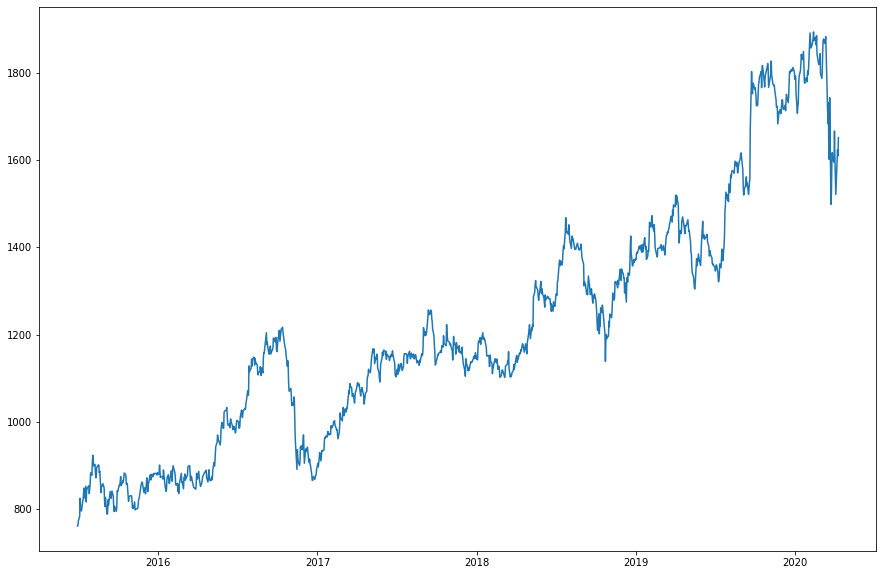

In [12]:
#plot
plt.plot(df['date'],df['close'], label='Close Price history')

In [13]:
# Get the Adjusted Close Price
df = df[['date','wr',	'moving_avg'	,'RSI',	'stoch','adj_close']]
#Take a look at the new data
print (df)

           date         wr   moving_avg        RSI      stoch    adj_close
1174 2015-07-01  -0.853180   280.906667   0.000000  99.146820   733.908081
1175 2015-07-02  -1.685685   314.543335   0.000000  98.314315   735.933899
1176 2015-07-03  -0.990617   348.963336   0.000000  98.992575   745.387512
1177 2015-07-06  -0.453323   387.346669   0.000000  99.538878   755.853943
1178 2015-07-07  -0.544922   426.870000   0.000000  99.443359   795.452881
...         ...        ...          ...        ...        ...          ...
2343 2020-04-01 -61.226339  1648.039974  42.525059  41.691911  1603.199951
2344 2020-04-03 -78.257166  1626.543310  37.965648  25.731511  1520.900024
2345 2020-04-07 -44.750418  1614.949984  45.756591  55.249582  1623.800049
2346 2020-04-08 -49.010341  1609.986645  44.884954  54.299663  1608.949951
2347 2020-04-09 -32.747836  1604.636645  47.919919  67.489263  1651.349976

[1174 rows x 6 columns]


## Preprocessing-

In [0]:
df=df.dropna()

Choosing the features to be used in prediction:

In [0]:
X=df[['wr',	'moving_avg'	,'RSI',	'stoch']]
y=df['adj_close']
y=np.asarray(y)

In [0]:
X_train=X[:int(0.8*len(X))]
X_train_date=df['date'][:int(0.8*len(X))]
X_test=X[int(0.8*len(X)):]
X_test_date=df['date'][int(0.8*len(X)):]
y_train=y[:int(0.8*len(y))]
y_test=y[int(0.8*len(y)):]

In [0]:
minn=np.min(X_train)
maxx=np.max(X_train)
X_train=(X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train))
X_test=(X_test-minn)/(maxx-minn)

## Visualizing the train-test split-

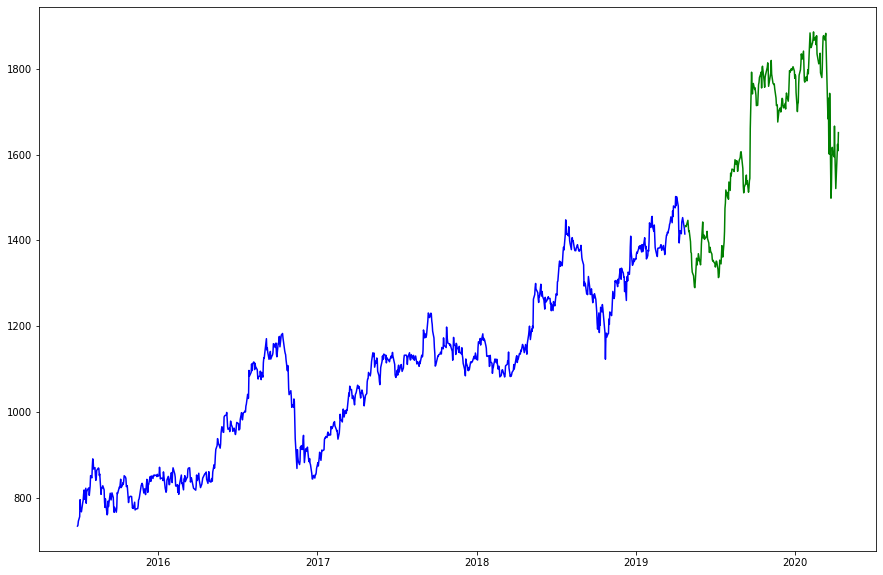

In [18]:
plt.plot(X_train_date,y_train, 'blue', label='Training Data')
plt.plot(X_test_date,y_test, 'green', label='Testing Data')

## SVR BASE LEARNER-

In [0]:
svr= SVR(kernel='linear', C=1e3,gamma=0.1)
svr.fit(X_train,y_train)
y_svr=svr.predict(X_test)


## SVR RMS error-

In [20]:
error_svr=np.sqrt(np.mean(np.square(y_svr-y_test)))
error_svr

40.768260290479894

## Visualizing the performance of SVR-

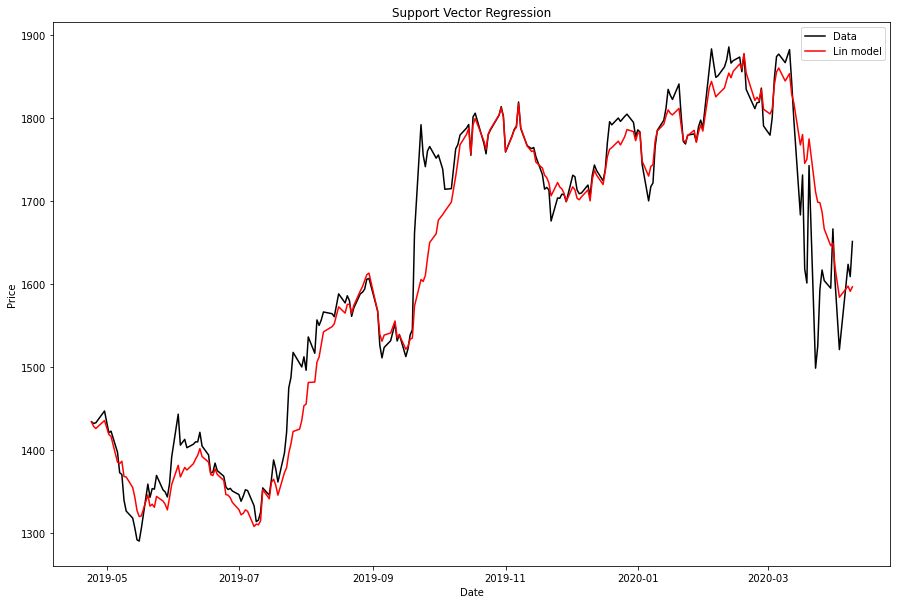

In [21]:
plt.plot(X_test_date, y_test, c='k', label='Data')
y_svr=svr.predict(X_test)
plt.plot(X_test_date, y_svr, c='r', label='Lin model') 

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

## ARIMA BASE LEARNER and RMS error-

In [22]:
from sklearn.metrics import mean_squared_error

history =y_train
print(type(history))
predictions = np.array([])
for t in range(len(y_test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions=np.append(predictions,yhat)
    obs = y_test[t]
    history=np.append(history,obs)
error_arima = np.sqrt(np.mean(np.square(predictions-y_test)))
print('RMS error: ',error_arima)

<class 'numpy.ndarray'>
RMS error:  33.95403170845315


## ARIMA performance-

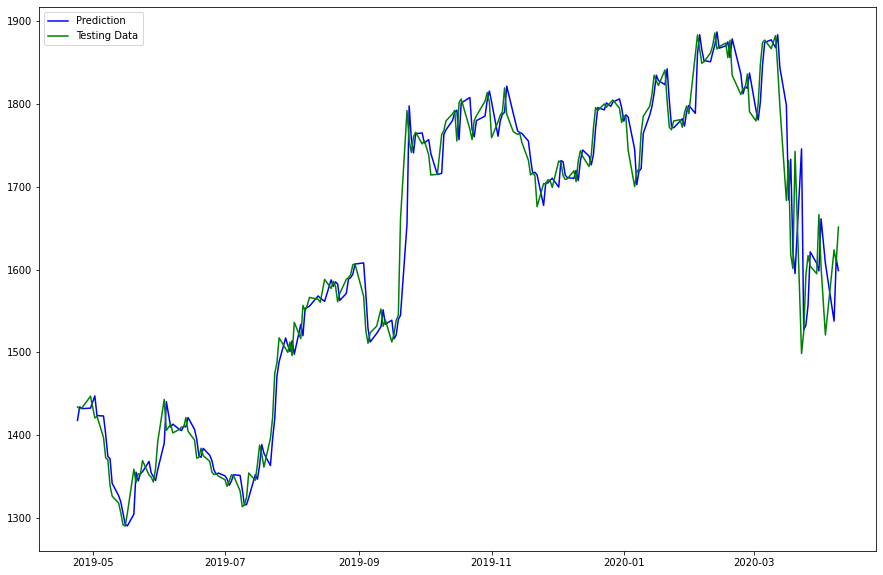

In [23]:
plt.plot(X_test_date,predictions, 'blue', label='Prediction')
plt.plot(X_test_date,y_test, 'green', label='Testing Data')
plt.legend()
plt.show()

# Calculating the weights of the base learners-

In [24]:
svr_weight=(error_arima+error_svr)/error_svr
arima_weight=(error_arima+error_svr)/error_arima
svr_weight_norm=svr_weight/(svr_weight+arima_weight)
arima_weight_norm=arima_weight/(svr_weight+arima_weight)
svr_weight_norm,arima_weight_norm

(0.45440297400055635, 0.5455970259994436)

## Ensemble RMS error-

In [25]:
weighted_avg_pred=svr_weight_norm*y_svr+arima_weight_norm*predictions
print("RMS error: ",np.sqrt(np.mean(np.square(weighted_avg_pred-y_test))))

RMS error:  31.229614634974954


## Visualizing the ensemble performance-

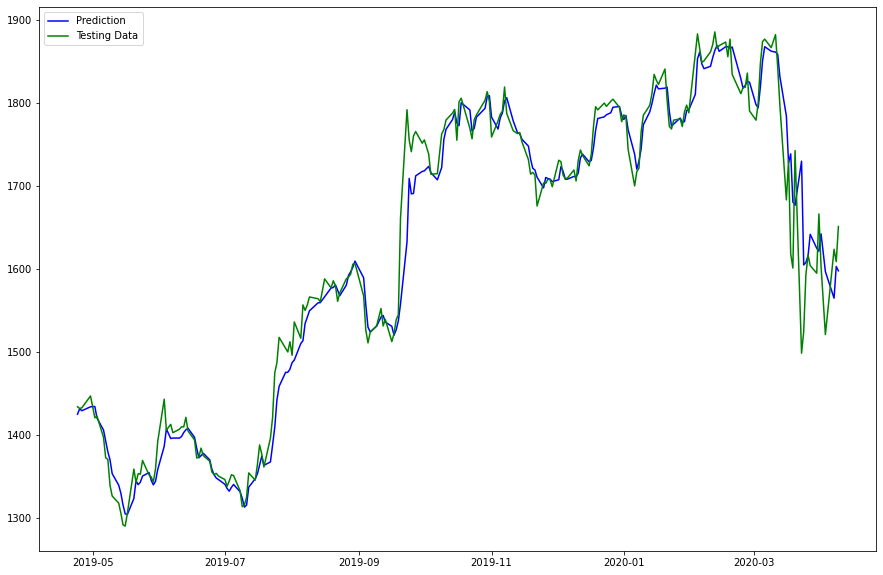

In [26]:
plt.plot(X_test_date,weighted_avg_pred, 'blue', label='Prediction')
plt.plot(X_test_date,y_test, 'green', label='Testing Data')

plt.legend()
plt.show()

# COMPARATIVE ANALYSIS-

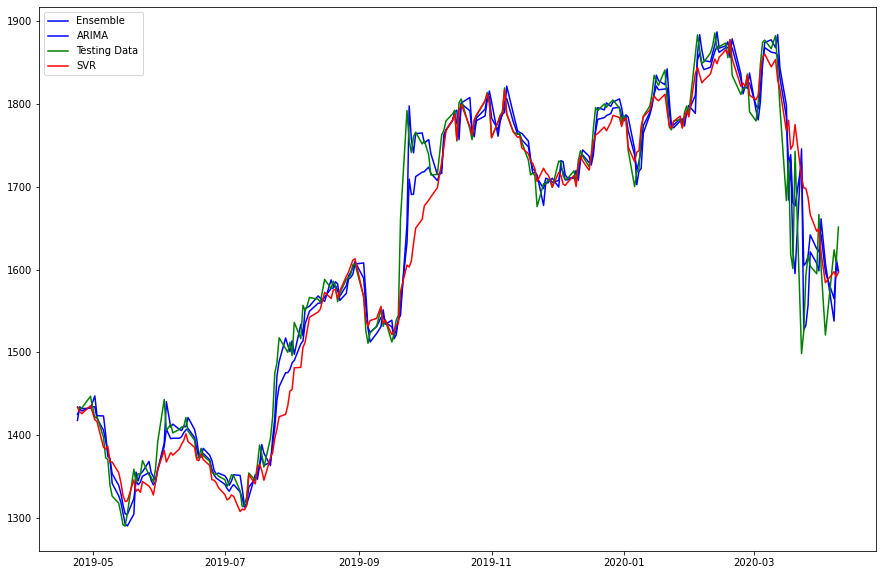

Ensemble RMS error:  31.229614634974954
ARIMA RMS error:  33.95403170845315
SVR RMS error:  40.768260290479894


In [27]:
plt.plot(X_test_date,weighted_avg_pred, 'blue', label='Ensemble')
plt.plot(X_test_date,predictions, 'blue', label='ARIMA')
plt.plot(X_test_date,y_test, 'green', label='Testing Data')
plt.plot(X_test_date, y_svr, c='r', label='SVR')

plt.legend()
plt.show()
print("Ensemble RMS error: ",np.sqrt(np.mean(np.square(weighted_avg_pred-y_test))))
print('ARIMA RMS error: ',error_arima)
print('SVR RMS error: ',error_svr)
 